In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns' , None)

In [7]:
# Importing the Dataset

data = pd.read_csv('spam.csv' , encoding='ISO-8859-1')

In [8]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
data.shape

(5572, 5)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Steps that are required for the Project


1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building 
5. Evaluation
6. Improvement
7. Website
8. Deployment

### 1. Data Cleaning

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
# Last 3 columns have very few values ; dropping last 3 columns

data.drop(columns = ['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , inplace = True)

In [13]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# Renaming columns

data.rename(columns = {'v1' : 'target' , 'v2' : 'text_msg'} , inplace = True)

In [15]:
data.sample(5)

,target,text_msg
3670,ham,Yup. Thk of u oso boring wat.
2561,ham,And maybe some pressies
2156,ham,Hey cutie. How goes it? Here in WALES its kind...
4924,ham,Ok... Let u noe when i leave my house.
3419,spam,"As a valued customer, I am pleased to advise y..."


In [16]:
data['target'].unique()

array(['ham', 'spam'], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [18]:
data['target'] = encoder.fit_transform(data.target)

In [19]:
data.head()

,target,text_msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
## missing values

data.isnull().sum()

target      0
text_msg    0
dtype: int64

In [21]:
## duplicated values

data.duplicated().value_counts()

False    5169
True      403
Name: count, dtype: int64

In [22]:
data.drop_duplicates(keep = "first" , inplace = True)

In [23]:
data.duplicated().value_counts()

False    5169
Name: count, dtype: int64

In [24]:
data.shape

(5169, 2)

### 2. EDA

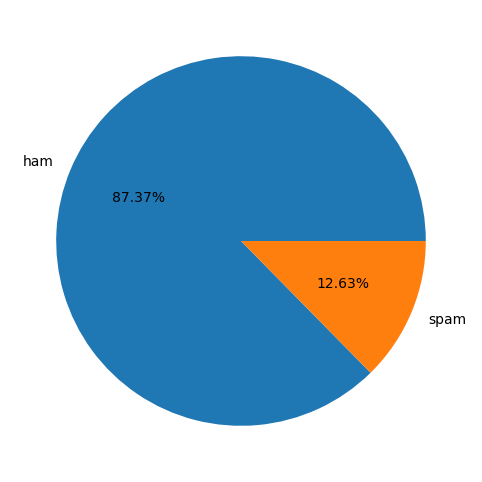

In [25]:
## Percentage of Spam and Ham in the dataset

spam = { 'ham' : data.target.value_counts()[0] ,
       'spam' : data.target.value_counts()[1] 
       }

plt.figure(figsize = (10,6))
plt.pie(spam.values() , autopct= "%.2f%%" , labels = spam.keys() )
plt.show()

The data is imbalanced as we see that 88% of the data is not spam.

In [26]:
## Calculating the number of alphabet , words and sentences

data.head()

,target,text_msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
data['num_character'] = data['text_msg'].apply(len)

In [29]:
data

,target,text_msg,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [30]:
data['num_words'] = data['text_msg'].apply(lambda x : len(nltk.word_tokenize(x)))

In [31]:
data

,target,text_msg,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [32]:
data['num_sentence'] = data['text_msg'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [33]:
data

,target,text_msg,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [35]:
data[['num_character' , 'num_words' , 'num_sentence']].describe()

,num_character,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
### Descriptive statistic about the spam classified emails/sms

data[data['target'] == 1][['num_character' , 'num_words' , 'num_sentence']].describe()

,num_character,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [37]:
## Descriptive statistic on the Ham classified emails/sms

data[data['target'] == 0][['num_character' , 'num_words' , 'num_sentence']].describe()

,num_character,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_character', ylabel='Count'>

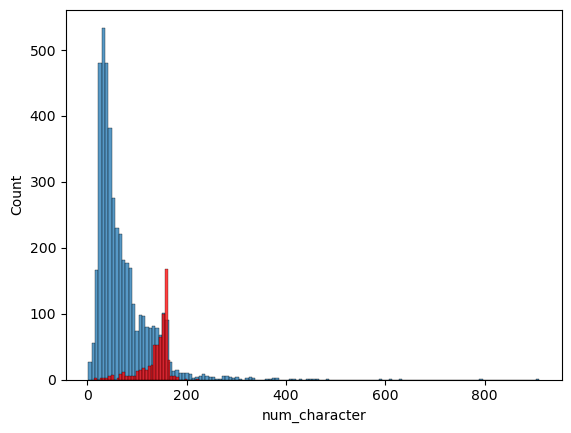

In [38]:
sns.histplot(data[data['target'] == 0]['num_character'] ) # Ham
sns.histplot(data[data['target'] == 1]['num_character'] , color= 'r') # Spam

<Axes: xlabel='num_words', ylabel='Count'>

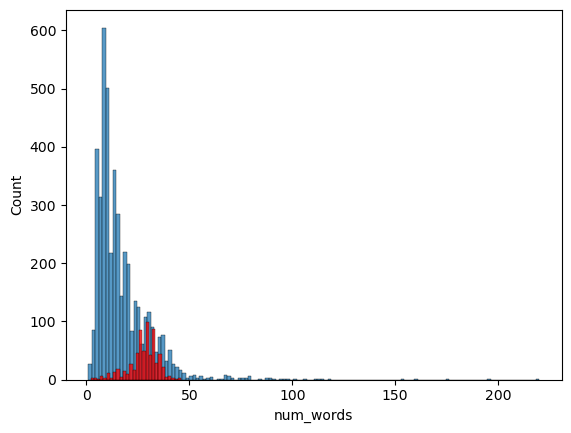

In [39]:
sns.histplot(data[data['target'] == 0]['num_words'] ) # Ham
sns.histplot(data[data['target'] == 1]['num_words'] , color= 'r') # Spam

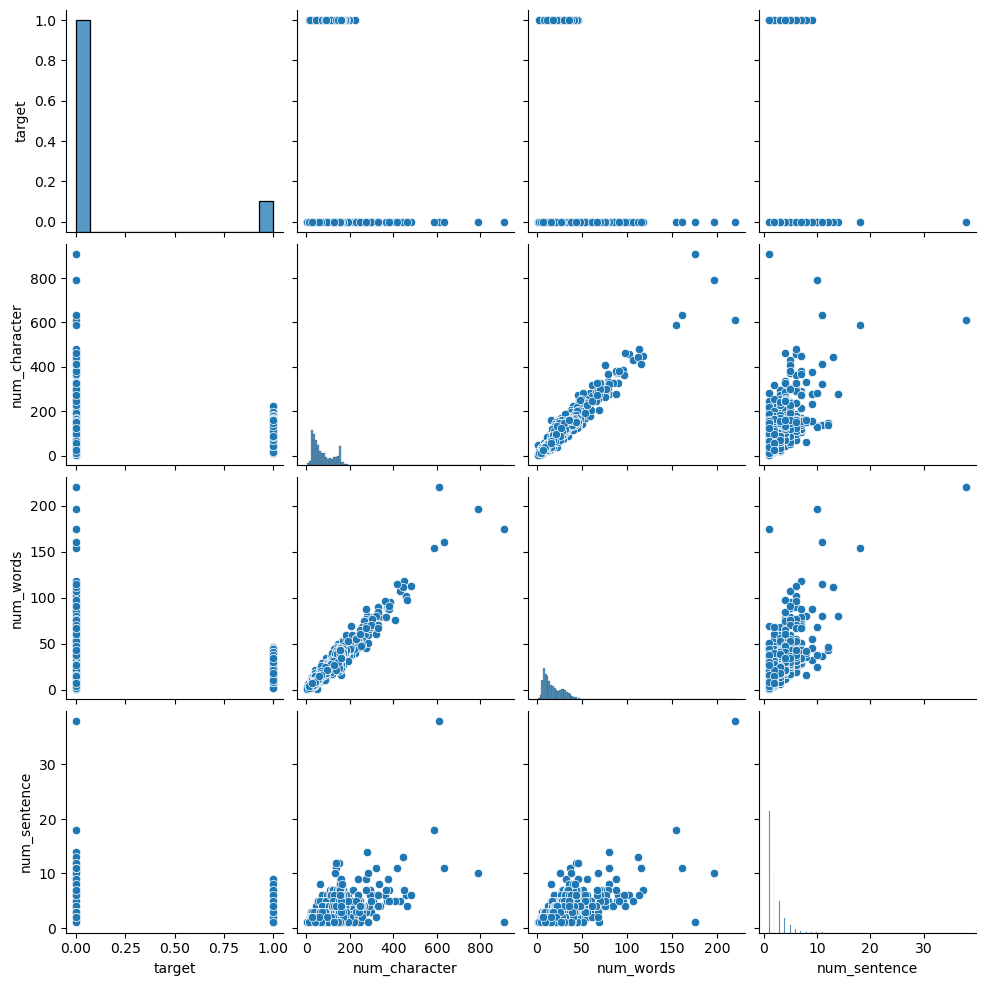

In [40]:
sns.pairplot(data)

<Axes: >

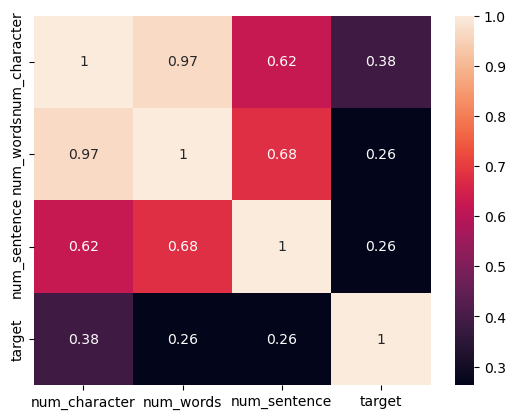

In [41]:
sns.heatmap(data[['num_character' , 'num_words' , 'num_sentence' , 'target']].corr() , annot= True)

### Observation

Based on the above heatmap we see that the independent variable like character_num , num_words , num_sentence have high correlation between them , hence not all of them can be used in the model. Out of the three columns we choose character_num as it has most correlation with the target column .

### 3. Data Preprocessing

- Lowercase 
- Tokenization
- Removing Special Character
- Removing stop words and punctuation
- Stemming

In [65]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

def text_cleaning(text):
    ## converting to lowercase
    
    text = text.lower()
    
    #  Tokenization
    
    text_ = nltk.word_tokenize(text)
    
    # Removing special character
    
    y = []
    for i in text_:
        if i.isalnum():
            y.append(i)
            
    # Removing stopwords and punctuation
    x = []
    stop_words = set(stopwords.words('english'))
    for i in y :
        if i not in stop_words and i not in string.punctuation:
            x.append(i)
            
    # Performing stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in x]    
            
    return ' '.join(words)

In [68]:
data['transformed_txt'] = data['text_msg'].apply(text_cleaning)

In [74]:
## generating wordcloud for spam words

from wordcloud import WordCloud

wc = WordCloud(width=500 , height= 500 , min_font_size = 11 , background_color= 'black')

spam_wc = wc.generate(data[data['target'] == 1]['transformed_txt'].str.cat(sep = ' ')) # concatinating into a single sentence


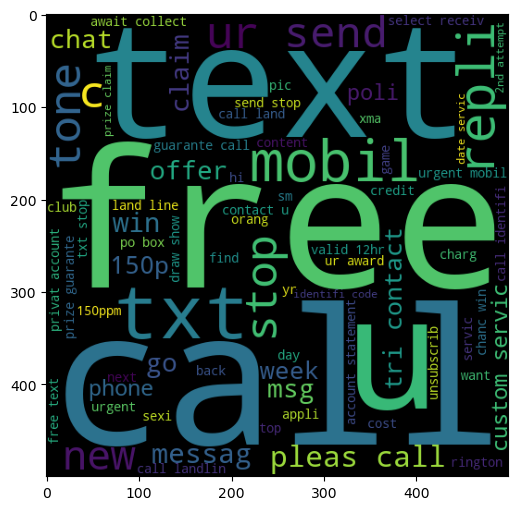

In [75]:
plt.figure(figsize= (12 , 6))
plt.imshow(spam_wc)
plt.show()

In [76]:
## generating wordcloud for not spam words

wc = WordCloud(width=500 , height= 500 , min_font_size = 11 , background_color= 'black')

not_spam_wc = wc.generate(data[data['target'] == 0]['transformed_txt'].str.cat(sep = ' '))

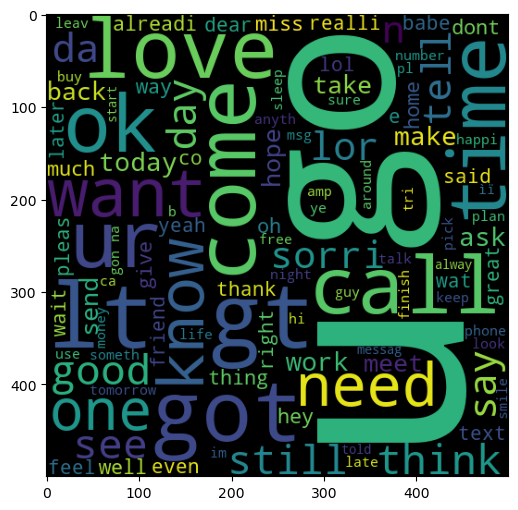

In [77]:
plt.figure(figsize= (12 , 6))
plt.imshow(not_spam_wc)
plt.show()

In [110]:
# Finding the top 30 words used in spam msg by count

spam_dict = {}

for i in data[data['target'] == 1]['transformed_txt'].str.cat(sep = " ").split():
    if i in spam_dict:
        spam_dict[i] += 1
    else:
        spam_dict[i] = 1

sorted_spam = dict(sorted(spam_dict.items() , key= lambda x : x[1] , reverse = True)[0:30])

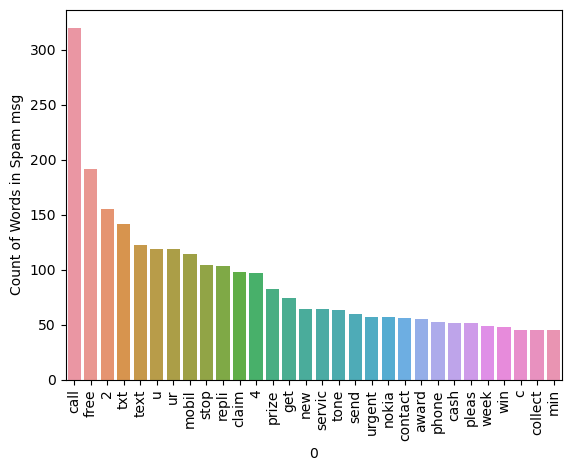

In [111]:
sns.barplot(x = pd.DataFrame(sorted_spam.items())[0] , y = pd.DataFrame(sorted_spam.items())[1])
plt.xticks(rotation = 90)
plt.ylabel('Count of Words in Spam msg')
plt.show()

In [109]:
# Finding the top 30 words used in not spam / ham msg by count

ham_dict = {}

for i in data[data['target'] == 0]['transformed_txt'].str.cat(sep = " ").split():
    if i in ham_dict:
        ham_dict[i] += 1
    else:
        ham_dict[i] = 1

sorted_ham = dict(sorted(ham_dict.items() , key= lambda x : x[1] , reverse = True)[0:30])

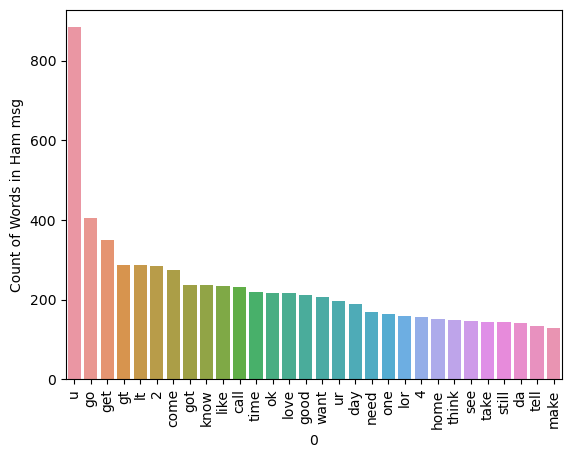

In [112]:
sns.barplot(x = pd.DataFrame(sorted_ham.items())[0] , y = pd.DataFrame(sorted_ham.items())[1])
plt.xticks(rotation = 90)
plt.ylabel('Count of Words in Ham msg')
plt.show()

### 4. Model Building

In [134]:
## Converting text to vector format so that the Model can take it as input

x = data.iloc[:, -1].values
y = data.loc[: , 'target']

In [181]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

cv = CountVectorizer()
tf = TfidfVectorizer( max_features= 3000)

In [182]:
x_ = tf.fit_transform(x).toarray()

In [183]:
x_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [184]:
x_.shape

(5169, 3000)

In [185]:
y.shape

(5169,)

In [186]:
# Splitting into train and test 

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x_ , y , test_size = 0.25 , random_state = 42)

In [187]:
# Using naive bayes as it performs well on textual data

from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB

gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

In [188]:
# Training

gb.fit(x_train , y_train)
mb.fit(x_train , y_train)
bb.fit(x_train , y_train)

BernoulliNB()

In [189]:
from sklearn.metrics import accuracy_score , classification_report

In [190]:
gb.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0])

In [191]:
print("Gaussion NB test score :" , accuracy_score(y_test , gb.predict(x_test)))
print("Multinomial NB test score :" , accuracy_score(y_test , mb.predict(x_test)))
print("Bernoulli NB test score :" , accuracy_score(y_test , bb.predict(x_test)))

Gaussion NB test score : 0.8669760247486465
Multinomial NB test score : 0.9706109822119103
Bernoulli NB test score : 0.9729311678267595


In [192]:
# Gaussian

print(classification_report(y_test , gb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1107
           1       0.52      0.84      0.64       186

    accuracy                           0.87      1293
   macro avg       0.75      0.86      0.78      1293
weighted avg       0.91      0.87      0.88      1293



In [194]:
#Multinomial

print(classification_report(y_test , mb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1107
           1       0.99      0.81      0.89       186

    accuracy                           0.97      1293
   macro avg       0.98      0.90      0.94      1293
weighted avg       0.97      0.97      0.97      1293



In [195]:
#Bernoulli

print(classification_report(y_test , bb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1107
           1       0.97      0.83      0.90       186

    accuracy                           0.97      1293
   macro avg       0.97      0.91      0.94      1293
weighted avg       0.97      0.97      0.97      1293



In [196]:
# Here precision score would be reliable metric . Hence using tfidf --> Multinomial NB 

In [197]:
import joblib

joblib.dump(tf , 'vectorizer.pkl')

['vectorizer.pkl']

In [198]:
joblib.dump(mb , 'model.pkl')

['model.pkl']